# Spherical pendulum

- The model assummes a pendulum attached using a string, I'll edit it later
- (l,$\theta$,$\alpha$) are used to describe the positions

In [1]:
# Imports
import sympy as sym
import numpy as np
from IPython.display import display #for pretty printing

In [2]:
# create symbolic variables

# system parameters
X0,Y0, Z0 = sym.symbols(['X0','Y0', 'Z0']) # fixed position of Arm
g = sym.symbols('g')
mP,mA = sym.symbols(['mP','mA']) # mass of links
La,Lp = sym.symbols(['La','Lp']) # length of links
InA,InP = sym.symbols(['InA','InP']) # moment of intertia of links

# generalized coordinates
th,alph = sym.symbols(['\\theta','\\alpha']) #position
dth,dalph = sym.symbols(['\\dot{\\theta}','\\dot{\\alpha}']) #velocity
ddth,ddalph = sym.symbols(['\\ddot{\\theta}','\\ddot{\\alpha}']) #acceleration

q = sym.Matrix([[th],[alph]]) #group into matrices
dq = sym.Matrix([[dth],[dalph]])
ddq = sym.Matrix([[ddth],[ddalph]])

display(ddq) #display prints it as cool latex stuff

Matrix([
[\ddot{\theta}],
[\ddot{\alpha}]])

In [18]:
# Positions
## Arm
xa = La*sym.sin(th)*sym.cos(alph)
ya = La*sym.sin(th)*sym.sin(alph)
za = La*(1-sym.cos(th))

## Pen
xp = La*sym.sin(th)*sym.cos(alph)
yp = La*sym.sin(th)*sym.sin(alph)
zp = La*(1-sym.cos(th))

rArm = sym.Matrix([xa, ya, za])
rPen = sym.Matrix([xp, yp, zp])

# Linear Velocities
drArm = rArm.jacobian(q)*dq
drPen = rPen.jacobian(q)*dq

# Angular velocities
display(drArm)

Matrix([
[-La*\dot{\alpha}*sin(\alpha)*sin(\theta) + La*\dot{\theta}*cos(\alpha)*cos(\theta)],
[ La*\dot{\alpha}*sin(\theta)*cos(\alpha) + La*\dot{\theta}*sin(\alpha)*cos(\theta)],
[                                                       La*\dot{\theta}*sin(\theta)]])

In [22]:
# Energies
## Kinetic
TArm = sym.simplify(0.5*mA*drArm.T*drArm)
TPen = sym.simplify(0.5*mA*drArm.T*drArm)

T = sym.Matrix([TArm + TPen*0])
## Potential
VArm = sym.simplify(mA*g*rArm[2])
VPen = sym.simplify(mP*g*rPen[2])

V = sym.Matrix([VArm + VPen*0])

display(V)

Matrix([[La*g*mA*(1 - cos(\theta))]])

In [23]:
# Lagrangian
# STEP 4: calculate each term of the Lagrange equation
# term 1
Lg1 = sym.zeros(1,len(q))
for i in range(len(q)):
    dT_ddq = sym.diff(T,dq[i]) # get partial of T in dq_i
    Lg1[i] = dT_ddq.jacobian(q)*dq + dT_ddq.jacobian(dq)*ddq #...then get time derivative of that partial

# term 3
Lg3 = T.jacobian(q) # partial of T in q

# term 4
Lg4 = V.jacobian(q) # partial of U in q

#combine
EOM = Lg1 - Lg3 + Lg4
display(EOM)
#display(EOM) #<-this will give you an idea of the magnitude of the faff a decent symbolic package lets you avoid

Matrix([[1.0*La**2*\ddot{\theta}*mA - 1.0*La**2*\dot{\alpha}**2*mA*sin(\theta)*cos(\theta) + La*g*mA*sin(\theta), 1.0*La**2*\ddot{\alpha}*mA*sin(\theta)**2 + 2.0*La**2*\dot{\alpha}*\dot{\theta}*mA*sin(\theta)*cos(\theta)]])

# Attempt 2
- This version is based on the one found here 
- 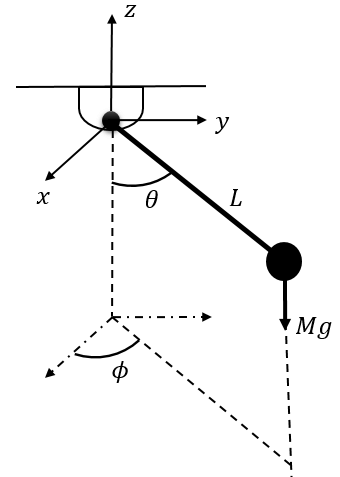

In [12]:
#symbolic variables
X0,Y0, Z0 = sym.symbols(['X0','Y0', 'Z0']) # fixed position of Arm
g = sym.symbols('g')
m = sym.symbols('m') # mass of links
l = sym.symbols('L') # length of links
In = sym.symbols('In') # moment of intertia of links

# generalized coordinates
th,ph = sym.symbols(['\\theta','\\phi']) #position
dth,dph = sym.symbols(['\\dot{\\theta}','\\dot{\\phi}']) #velocity
ddth,ddph = sym.symbols(['\\ddot{\\theta}','\\ddot{\\phi}']) #acceleration

q = sym.Matrix([[th],[ph]]) #group into matrices
dq = sym.Matrix([[dth],[dph]])
ddq = sym.Matrix([[ddth],[ddph]])

display(ddq, l) #display prints it as cool latex stuff


## Positions
x = l*sym.sin(th)*sym.cos(ph)
y = l*sym.sin(th)*sym.sin(ph)
z = l*sym.cos(th)

r = sym.Matrix([x, y, z])

## Velocities
### Linear velocities
dr = sym.simplify(r.jacobian(q)*dq)
display(r, dr)

### Angular velocities
# go brrr



Matrix([
[\ddot{\theta}],
[  \ddot{\phi}]])

L

Matrix([
[L*sin(\theta)*cos(\phi)],
[L*sin(\phi)*sin(\theta)],
[          L*cos(\theta)]])

Matrix([
[L*(-\dot{\phi}*sin(\phi)*sin(\theta) + \dot{\theta}*cos(\phi)*cos(\theta))],
[ L*(\dot{\phi}*sin(\theta)*cos(\phi) + \dot{\theta}*sin(\phi)*cos(\theta))],
[                                               -L*\dot{\theta}*sin(\theta)]])

# Attempt 3
- This attempt is based on first principals
- I used relative angles, if other wise just change the variables thr to th2 and phr to ph2
- [x] need to fix angular velocities
- Can now use this to set rotary pendulum by making $\theta_1 = \frac{\pi}{2}$ and making $\theta_2 = \frac{\pi}{2}$

In [3]:
# import libraries
import sympy as sym
import numpy as np

from IPython.display import display #for pretty printing

# symbols
# system parameters
X0,Y0, Z0 = sym.symbols(['X0','Y0', 'Z0']) # fixed position of Arm
g = sym.symbols('g')
mP,mA = sym.symbols(['mP','mA']) # mass of links
La,Lp = sym.symbols(['La','Lp']) # length of links
InA,InP = sym.symbols(['InA','InP']) # moment of intertia of links

# generalized coordinates
th1,ph1,th2,ph2 = sym.symbols(['\\theta_{1}','\\phi_{1}','\\theta_{2}','\\phi_{2}']) #position
dth1,dph1, dth2, dph2 = sym.symbols(['\\dot{\\theta_{1}}','\\dot{\\phi_{1}}', '\\dot{\\theta_{2}}','\\dot{\\phi_{2}}']) #velocity
ddth1,ddph1, ddth2, ddph2 = sym.symbols(['\\ddot{\\theta_{1}}','\\ddot{\\phi_{1}}', '\\ddot{\\theta_{2}}','\\ddot{\\phi_{2}}']) #acceleration

# assuming not absolute angles
thr = th1+th2
phr = ph1+ph2

q = sym.Matrix([[th1],[ph1],[th2],[ph2]]) #group into matrices
dq = sym.Matrix([[dth1],[dph1],[dth2],[dph2]])
ddq = sym.Matrix([[ddth1],[ddph1],[ddth2],[ddph2]])
qt = ddq.T
display(qt) #display prints it as cool latex stuff

# positiions
## Link 1
x1 = La*sym.sin(th1)*sym.cos(ph1)/2
y1 = -La*sym.sin(th1)*sym.sin(ph1)/2
z1 = -La*sym.cos(th1)/2

x2 = x1*2 + La*sym.sin(thr)*sym.cos(phr)/2
y2 = y1*2 - La*sym.sin(thr)*sym.sin(phr)/2
z2 = z1*2 - Lp*sym.cos(thr)/2

rArm = sym.simplify(sym.Matrix([x1, y1, z1]))
rPen = sym.simplify(sym.Matrix([x2, y2, z2]))


# velocities
## linear velocities
drArm = rArm.jacobian(q)*dq
drPen = rPen.jacobian(q)*dq

## angular velocities

# energies
## kinetic
Tarm = 1/2 * mA * drArm.T*drArm
Tpen = 1/2 * mP * drPen.T*drPen
T = sym.Matrix([sym.simplify(Tarm+Tpen)])


## potential
Varm = mA*g*z1
Vpen = mP*g*z2
V = sym.Matrix([sym.simplify(Varm+Vpen)])

# Lagrangian
Lg1 = sym.zeros(1,len(q))
for i in range(len(q)):
    dT_ddq = sym.diff(T,dq[i]) # get partial of T in dq_i
    Lg1[i] = dT_ddq.jacobian(q)*dq + dT_ddq.jacobian(dq)*ddq #...then get time derivative of that partial

# term 3
Lg3 = T.jacobian(q) # partial of T in q

# term 4
Lg4 = V.jacobian(q) # partial of U in q

#combine
EOM = Lg1 - Lg3 + Lg4

Matrix([[\ddot{\theta_{1}}, \ddot{\phi_{1}}, \ddot{\theta_{2}}, \ddot{\phi_{2}}]])

Matrix([[-0.25*La**2*\dot{\theta_{1}}**2*mA*sin(\theta_{1})*cos(\theta_{1}) - 0.125*La**2*mA*(\dot{\phi_{1}}*sin(\phi_{1})*sin(\theta_{1}) - \dot{\theta_{1}}*cos(\phi_{1})*cos(\theta_{1}))*(2*\dot{\phi_{1}}*sin(\phi_{1})*cos(\theta_{1}) + 2*\dot{\theta_{1}}*sin(\theta_{1})*cos(\phi_{1})) - 0.125*La**2*mA*(\dot{\phi_{1}}*sin(\theta_{1})*cos(\phi_{1}) + \dot{\theta_{1}}*sin(\phi_{1})*cos(\theta_{1}))*(2*\dot{\phi_{1}}*cos(\phi_{1})*cos(\theta_{1}) - 2*\dot{\theta_{1}}*sin(\phi_{1})*sin(\theta_{1})) - 0.125*La**2*mP*(\dot{\phi_{1}}*(2*sin(\phi_{1})*sin(\theta_{1}) + sin(\phi_{1} + \phi_{2})*sin(\theta_{1} + \theta_{2})) + \dot{\phi_{2}}*sin(\phi_{1} + \phi_{2})*sin(\theta_{1} + \theta_{2}) - \dot{\theta_{1}}*(2*cos(\phi_{1})*cos(\theta_{1}) + cos(\phi_{1} + \phi_{2})*cos(\theta_{1} + \theta_{2})) - \dot{\theta_{2}}*cos(\phi_{1} + \phi_{2})*cos(\theta_{1} + \theta_{2}))*(2*\dot{\phi_{1}}*(2*sin(\phi_{1})*cos(\theta_{1}) + sin(\phi_{1} + \phi_{2})*cos(\theta_{1} + \theta_{2})) + 2*\dot{\phi

In [4]:
#initial conditions
th10 = np.pi/4
th20 = 0
ph10 = np.pi/8
ph20 = 0
dth10 = 0
dth20 = 0
dph10 = 0
dph20 = 0

h = 0.01

#parameters
X0val = 0
Y0val = 0
Z0val = 0
laval = 1
lpval = 1

parameter_values = [(X0,X0val),(Y0,Y0val),(g,9.81),(mA,1),(mP,1),(La,laval),(Lp,lpval),(InA,0.08),(InP,0.08)]

th1ar = [th10]
th2ar = [th20]
ph1ar = [ph10]
ph2ar = [ph20]
dth1ar = [dth10]
dth2ar = [dth20]
dph1ar = [dph10]
dph2ar = [dph20]

N = 100
for i in range(1,N):
    # substitute parameter values and previous conditions into the EOM 
    past = [(th1,th1ar[i-1]),(th2,th2ar[i-1]), 
            (ph1,ph1ar[i-1]),(ph2,ph2ar[i-1]), 
            (dth1,dth1ar[i-1]),(dth2,dth2ar[i-1]), 
            (dph1,dph1ar[i-1]),(dph2,dph2ar[i-1])]
    EOM_sub = EOM.subs(parameter_values).subs(past)
    
    # solve for the acceleration
    acc = sym.solve(EOM_sub,[ddth1, ddth2, ddph1, ddph2])
    
    # integrate for the next velocity and position
    dph1ar.append(float(dph1ar[i-1]+h*acc[ddph1]))
    dph2ar.append(float(dph2ar[i-1]+h*acc[ddph2]))

    dth1ar.append(float(dth1ar[i-1]+h*acc[ddth1]))
    dth2ar.append(float(dth2ar[i-1]+h*acc[ddth2]))
    
    ph1ar.append(float(ph1ar[i-1]+h*dph1ar[i]))
    ph2ar.append(float(ph2ar[i-1]+h*dph2ar[i]))
    
    th1ar.append(float(th1ar[i-1]+h*dth1ar[i]))
    th2ar.append(float(th2ar[i-1]+h*dth2ar[i]))

print(th1ar)

[0.7853981633974483, 0.7840108198927602, 0.7812458215980331, 0.7771229202294223, 0.7716726963483926, 0.7649375444523133, 0.7569726125693638, 0.7478463588703215, 0.7376403669036332, 0.7264481286788699, 0.7143726794138605, 0.7015232238814285, 0.688011155337309, 0.6739460345111525, 0.6594320998470561, 0.6445657256212352, 0.6294340042374221, 0.6141143972588506, 0.5986752432950425, 0.5831768482331411, 0.5676728953820369, 0.5522119663382892, 0.5368390280700909, 0.5215967994154675, 0.5065269531489298, 0.4916711371084775, 0.47707181183888575, 0.4627729056516301, 0.44882028306354005, 0.43526201010602455, 0.4221483793353646, 0.40953162623121186, 0.39746522306017984, 0.386002570761884, 0.37519481838357616, 0.36508742146504525, 0.35571491881885825, 0.3470933132396921, 0.33920951916271114, 0.3320078563562866, 0.32537491594573603, 0.31912655615009694, 0.3130036495009421, 0.3066840373027084, 0.2998135350863067, 0.2920488534908778, 0.28309713436302825, 0.27273865295542893, 0.26082955210614983, 0.24729

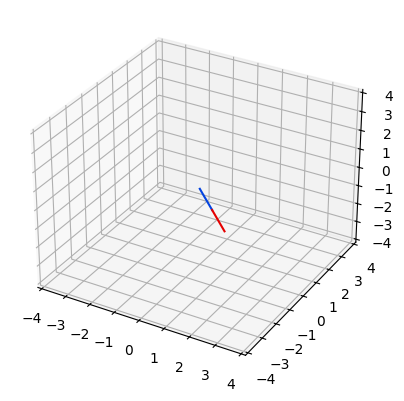

In [5]:
import matplotlib.pyplot as plt
import matplotlib.animation as ani
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML
%matplotlib inline

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')  # create 3D axes

def plot_pendulum(i, th1_in, th2_in, ax, ph1_in, ph2_in):  # update function for animation
    ax.clear()
    ax.set_xlim([-4, 4])
    ax.set_ylim([-4, 4])
    ax.set_zlim([-4, 4])

    # Debug: Print current angles
    #print(f"Frame {i}: th = {th1_in[i]}, alpha = {th2_in[i]}")

    # Plot link 1
    L1topx = X0val
    L1topy = Y0val
    L1topz = Z0val
    L1bottomx = X0val + laval * np.sin(th1_in[i]) * np.cos(ph1_in[i])
    L1bottomy = Y0val - laval * np.sin(th1_in[i]) * np.sin(ph1_in[i])
    L1bottomz = Z0val - laval * np.cos(th1_in[i])
    ax.plot([L1topx, L1bottomx], [L1topy, L1bottomy], [L1topz, L1bottomz], color='xkcd:blue')

    # Plot link 2
    L2bottomx = L1bottomx + lpval * np.sin(th1_in[i] + th2_in[i]) * np.cos(ph1_in[i] + ph2_in[i])
    L2bottomy = L1bottomy - lpval * np.sin(th1_in[i] + th2_in[i]) * np.sin(ph1_in[i] + ph2_in[i])
    L2bottomz = L1bottomz - lpval * np.cos(th1_in[i] + th2_in[i])
    ax.plot([L1bottomx, L2bottomx], [L1bottomy, L2bottomy], [L1bottomz, L2bottomz], color='xkcd:red')

# The update function is already defined and should work without changes
update = lambda i: plot_pendulum(i, th1ar, th2ar, ax1, ph1ar, ph2ar)  # update function

# Create animation
animate = ani.FuncAnimation(fig1, update, range(N), interval=50, repeat=True)

# Embed the animation in the notebook
HTML(animate.to_html5_video())
